In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [17]:

# Load and preprocess the data
df = pd.read_csv('./archiveweather/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'], index_col='dt')
df = df[df['Country'] == 'Poland']
time_series = df['AverageTemperature'].dropna()


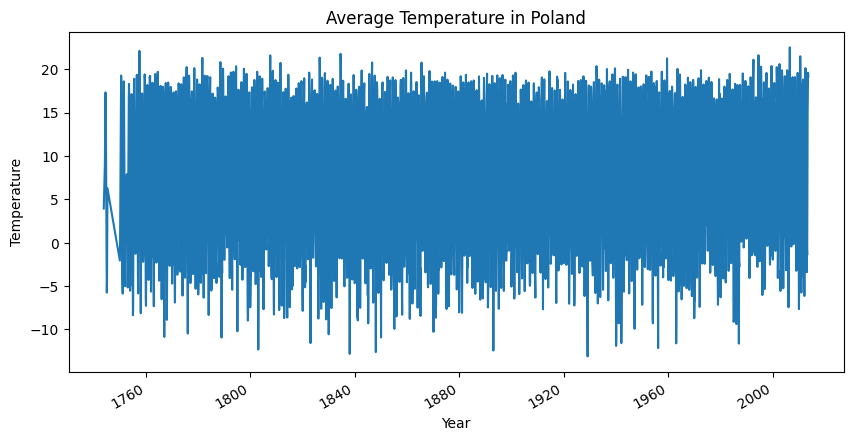

In [18]:

# Plotting the data
plt.figure(figsize=(10,5))
time_series.plot()
plt.title('Average Temperature in Poland')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()


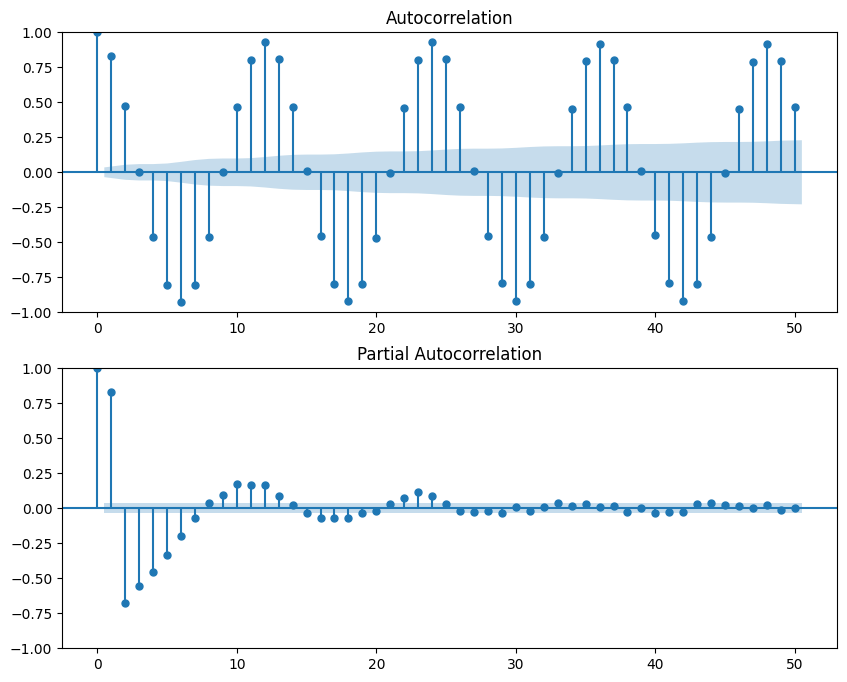

In [19]:

# Determining ARIMA parameters using ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(10,8))
sm.graphics.tsa.plot_acf(time_series, lags=50, ax=ax[0])
sm.graphics.tsa.plot_pacf(time_series, lags=50, ax=ax[1])
plt.show()


In [23]:

# Fit an ARIMA model
# Note: The values for p, d, q should be chosen based on ACF and PACF plots
model = ARIMA(time_series, order=(12, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/home/jozef/tf-env-11.8/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jozef/tf-env-11.8/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jozef/tf-env-11.8/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jozef/tf-env-11.8/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                 3166
Model:                ARIMA(12, 1, 1)   Log Likelihood               -6980.423
Date:                Wed, 24 Jan 2024   AIC                          13988.847
Time:                        20:38:36   BIC                          14073.686
Sample:                             0   HQIC                         14019.280
                               - 3166                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4201      0.097     -4.350      0.000      -0.609      -0.231
ar.L2         -0.4125      0.052     -7.936      0.000      -0.514      -0.311
ar.L3         -0.4247      0.046     -9.326      0.0

/home/jozef/tf-env-11.8/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


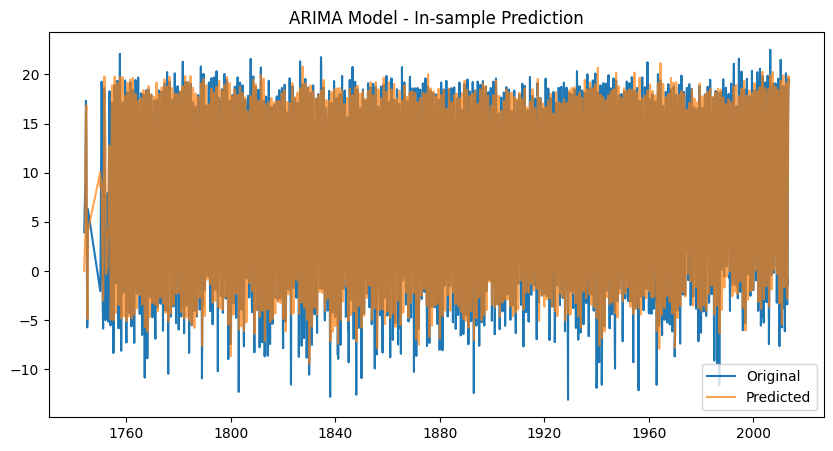

In [24]:

# In-sample prediction
time_series_pred = model_fit.predict(start=time_series.index[0], end=time_series.index[-1])

# Plotting the original data and predictions
plt.figure(figsize=(10,5))
plt.plot(time_series, label='Original')
plt.plot(time_series_pred, label='Predicted', alpha=0.7)
plt.title('ARIMA Model - In-sample Prediction')
plt.legend()
plt.show()


/home/jozef/tf-env-11.8/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/jozef/tf-env-11.8/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


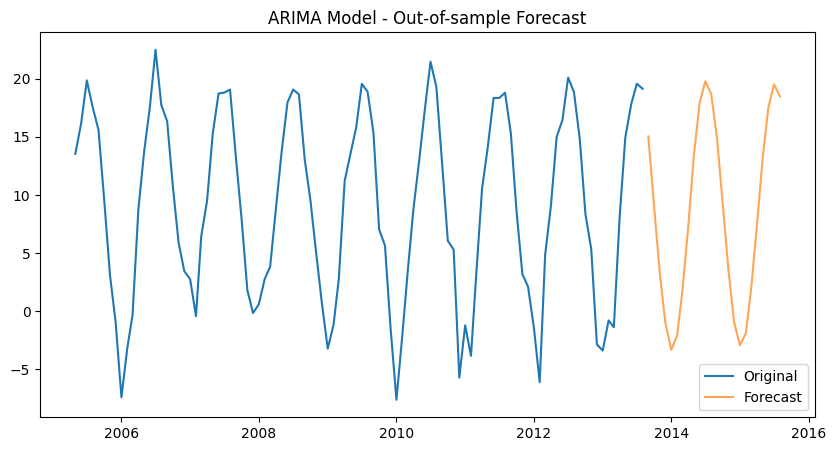

In [25]:

# Out-of-sample forecast
num_of_steps = 24  # For example, forecasting the next 24 months
forecast = model_fit.forecast(steps=num_of_steps)
forecast_index = pd.date_range(start=time_series.index[-1], periods=num_of_steps, freq='M')

# Plotting the forecast
plt.figure(figsize=(10,5))
plt.plot(time_series.index[-100:], time_series[-100:], label='Original')
plt.plot(forecast_index, forecast, label='Forecast', alpha=0.7)
plt.title('ARIMA Model - Out-of-sample Forecast')
plt.legend()
plt.show()